# Visualize BLEU Scores


In [1]:
!ls tabs

BLEU.lowercase.9L6L768d_bsize320k_step124k_beam4_lp0.6_ens10.txt
BleuMacroFChrF.lowercase.6L6L512d_vocab400k40k_bsize40k_step300k.txt
BleuMacroFChrF.lowercase.9L6L768d_bsize720k_step129k.txt
BleuMacroFChrF.mixedcase.9L6L768d_bsize720k_step129k.txt
brown-corpus.term-freqs.tsv
dataset-selection.min.tsv
dataset-selection.tsv
train.good.dedup.notest.ascitgt.tok.stats.tsv


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pathlib import Path

In [8]:
#help(pd.read_csv)

In [15]:
path = 'tabs/BleuMacroFChrF.mixedcase.9L6L768d_bsize720k_step129k.txt'
tab = pd.read_csv(path,sep=r'\s+', names='Test BLEU MacroF1 ChrF'.split())
tab

,Test,BLEU,MacroF1,ChrF
0,neulab_tedtalksv1_test-ben_eng,18.9,24.1,0.41
1,neulab_tedtalksv1_test-eus_eng,26.2,33.7,0.50
2,neulab_tedtalksv1_test-bos_eng,38.9,46.0,0.62
3,JoshuaIndianCorpus_test-urd_eng,15.4,19.7,0.46
4,neulab_tedtalksv1_test-bel_eng,23.0,24.4,0.44
...,...,...,...,...
177,UNv1_test-fra_eng,46.4,47.1,0.70
178,UNv1_test-ara_eng,57.1,51.5,0.77
179,UNv1_test-rus_eng,53.2,50.4,0.75
180,UNv1_test-spa_eng,56.0,53.4,0.77


In [16]:
tab['Test Name'] = tab['Test'].apply(lambda x: x.split('-')[0].replace('_test', ''))
tab['Language'] = tab['Test'].apply(lambda x: x.split('-')[1].split('_')[0].upper())
tab

,Test,BLEU,MacroF1,ChrF,Test Name,Language
0,neulab_tedtalksv1_test-ben_eng,18.9,24.1,0.41,neulab_tedtalksv1,BEN
1,neulab_tedtalksv1_test-eus_eng,26.2,33.7,0.50,neulab_tedtalksv1,EUS
2,neulab_tedtalksv1_test-bos_eng,38.9,46.0,0.62,neulab_tedtalksv1,BOS
3,JoshuaIndianCorpus_test-urd_eng,15.4,19.7,0.46,JoshuaIndianCorpus,URD
4,neulab_tedtalksv1_test-bel_eng,23.0,24.4,0.44,neulab_tedtalksv1,BEL
...,...,...,...,...,...,...
177,UNv1_test-fra_eng,46.4,47.1,0.70,UNv1,FRA
178,UNv1_test-ara_eng,57.1,51.5,0.77,UNv1,ARA
179,UNv1_test-rus_eng,53.2,50.4,0.75,UNv1,RUS
180,UNv1_test-spa_eng,56.0,53.4,0.77,UNv1,SPA


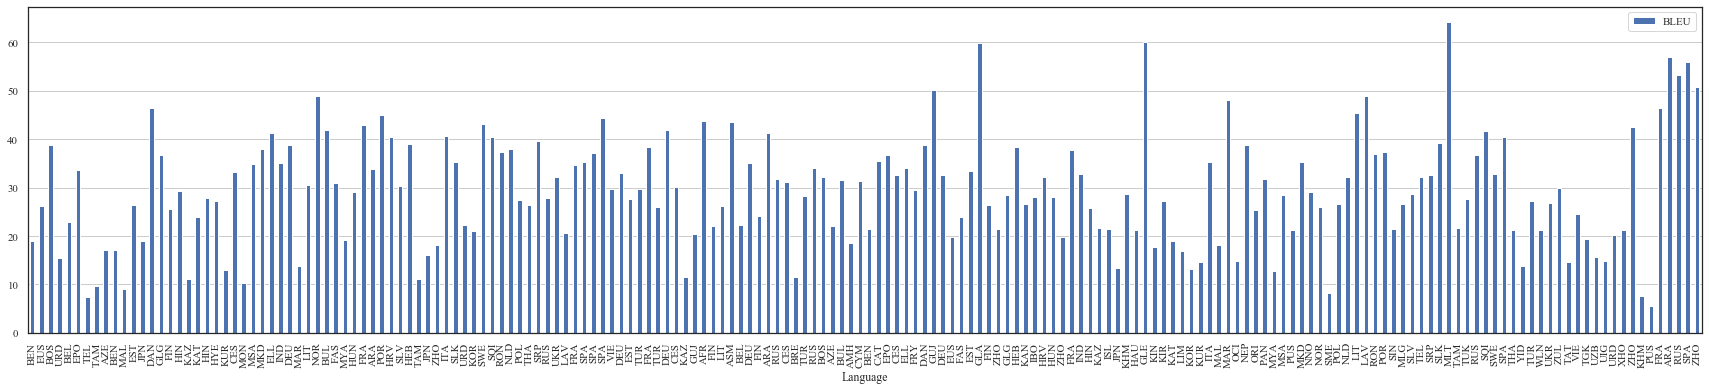

In [17]:
sns.set(font="Times New Roman", style='white',font_scale=.99)

ax = tab[['Language', 'BLEU']].plot.bar(figsize=(30, 6), x='Language', y='BLEU', )
ax.grid(axis='y')

#pd.DataFrame.plot(data=tab, x='Language', y='BLEU')

In [18]:
tab_sorted = tab.sort_values(by='BLEU', ascending=False)
tab_sorted

,Test,BLEU,MacroF1,ChrF,Test Name,Language
154,OPUS100v1_test-mlt_eng,64.2,58.4,0.79,OPUS100v1,MLT
121,OPUS100v1_test-gle_eng,60.0,51.1,0.78,OPUS100v1,GLE
103,OPUS100v1_test-gla_eng,59.8,37.2,0.67,OPUS100v1,GLA
178,UNv1_test-ara_eng,57.1,51.5,0.77,UNv1,ARA
180,UNv1_test-spa_eng,56.0,53.4,0.77,UNv1,SPA
...,...,...,...,...,...,...
10,JoshuaIndianCorpus_test-mal_eng,9.1,13.5,0.36,JoshuaIndianCorpus,MAL
141,OPUS100v1_test-sme_eng,8.3,8.7,0.18,OPUS100v1,SME
175,wikipedia_devtest_kmen-khm_eng,7.7,7.0,0.28,wikipedia_devtest_kmen,KHM
6,JoshuaIndianCorpus_test-tel_eng,7.5,11.6,0.35,JoshuaIndianCorpus,TEL


In [19]:
tab_uniq = tab_sorted.drop_duplicates(['Language'], keep='first')  # one test per language
tab_uniq

,Test,BLEU,MacroF1,ChrF,Test Name,Language
154,OPUS100v1_test-mlt_eng,64.2,58.4,0.79,OPUS100v1,MLT
121,OPUS100v1_test-gle_eng,60.0,51.1,0.78,OPUS100v1,GLE
103,OPUS100v1_test-gla_eng,59.8,37.2,0.67,OPUS100v1,GLA
178,UNv1_test-ara_eng,57.1,51.5,0.77,UNv1,ARA
180,UNv1_test-spa_eng,56.0,53.4,0.77,UNv1,SPA
...,...,...,...,...,...,...
167,OPUS100v1_test-tat_eng,14.7,11.8,0.36,OPUS100v1,TAT
162,OPUS100v1_test-yid_eng,13.8,7.8,0.28,OPUS100v1,YID
83,OPUS100v1_test-bre_eng,11.6,13.8,0.26,OPUS100v1,BRE
23,neulab_tedtalksv1_test-mon_eng,10.3,15.4,0.31,neulab_tedtalksv1,MON


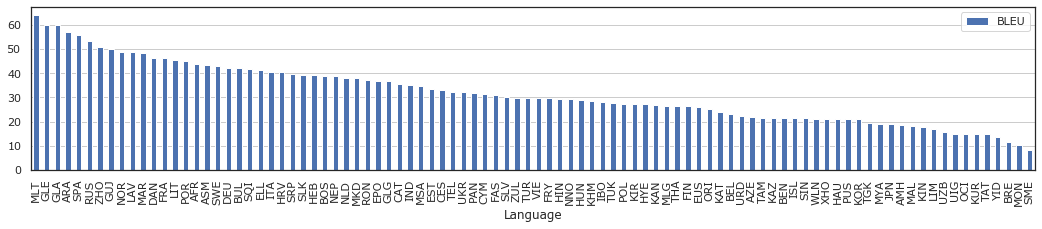

In [20]:
sns.set(font="Verdana", style='white',font_scale=1)
ax = tab_uniq[['Language', 'BLEU']].plot.bar(figsize=(18, 3), x='Language', y='BLEU')
ax.grid(axis='y')

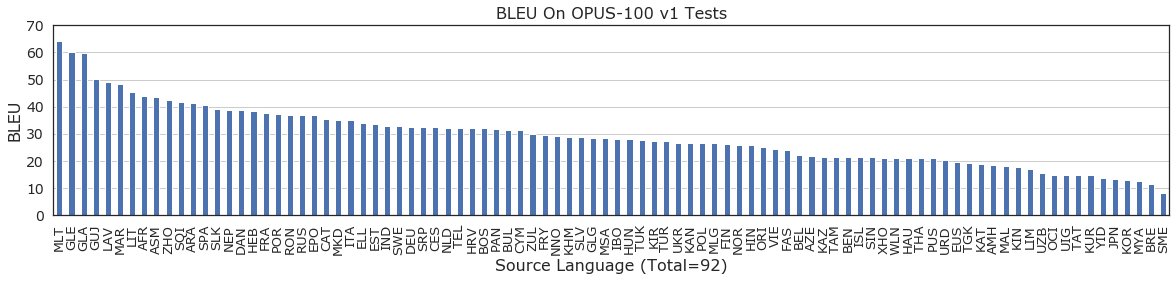

In [28]:
sns.set(font="Verdana", style='white',font_scale=1)
tab_opus = tab[tab['Test Name'] == 'OPUS100v1'].sort_values(by='BLEU', ascending=False).drop_duplicates(['Language'], keep='first')
viz_args = dict(xlabel=f'Source Language (Total={len(tab_opus)})', ylabel='BLEU', title=f'BLEU On OPUS-100 v1 Tests', figsize=(20, 3.5), legend=False)
ax = tab_opus[['Language', 'BLEU']].plot.bar(x='Language', y='BLEU', **viz_args)
ax.grid(axis='y', markevery=5)
plt.ylim(0, 70)
plt.yticks(fontsize=14)
plt.xticks(fontsize=13)
plt.xlabel(viz_args['xlabel'], fontsize=16)
plt.ylabel(viz_args['ylabel'], fontsize=16)
plt.title(viz_args['title'], fontsize=16)

plt.savefig('charts/BLEU-opus100.pdf', bbox_inches='tight')

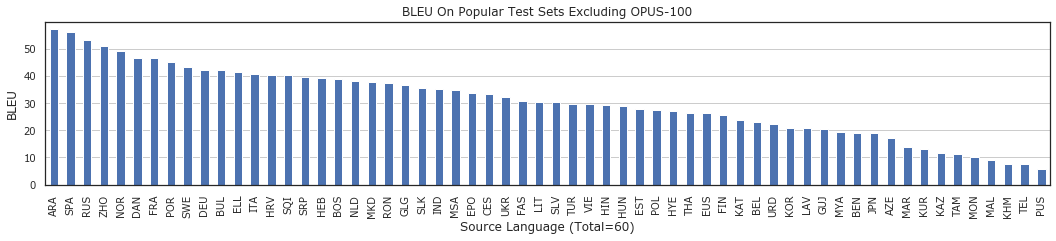

In [30]:
tab_nonopus = tab[tab['Test Name'] != 'OPUS100v1'].sort_values(by='BLEU', ascending=False).drop_duplicates(['Language'], keep='first')
viz_args = dict(xlabel=f'Source Language (Total={len(tab_nonopus)})', ylabel='BLEU', figsize=(18, 3), fontsize=10, legend=False)
ax = tab_nonopus[['Language', 'BLEU']].plot.bar(x='Language', y='BLEU', title=f'BLEU On Popular Test Sets Excluding OPUS-100', **viz_args)
ax.grid(axis='y')
plt.savefig('charts/BLEU-non-opus100.pdf', bbox_inches='tight')

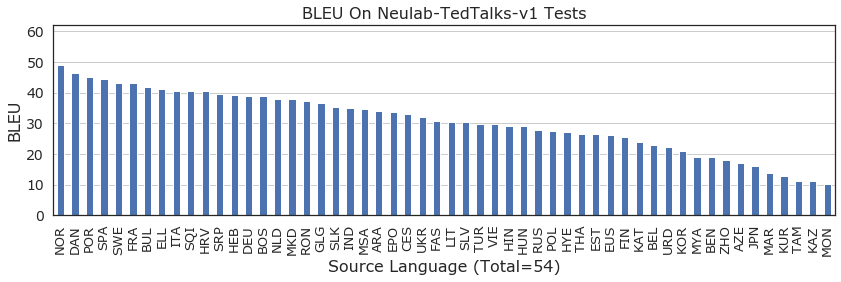

In [33]:
tab_nttalks = tab[tab['Test Name'] == 'neulab_tedtalksv1'].sort_values(by='BLEU', ascending=False).drop_duplicates(['Language'], keep='first')
viz_args = dict(xlabel=f'Source Language (Total={len(tab_nttalks)})', ylabel='BLEU', figsize=(14, 3.5), fontsize=16, legend=False, title=f'BLEU On Neulab-TedTalks-v1 Tests')
ax = tab_nttalks[['Language', 'BLEU']].plot.bar(x='Language', y='BLEU', **viz_args)
ax.grid(axis='y')
plt.ylim(0, 62)
plt.yticks(fontsize=14)
plt.xticks(fontsize=13)
plt.xlabel(viz_args['xlabel'], fontsize=16)
plt.ylabel(viz_args['ylabel'], fontsize=16)
plt.title(viz_args['title'], fontsize=16)
plt.savefig('charts/BLEU-nttalksv1.pdf', bbox_inches='tight')

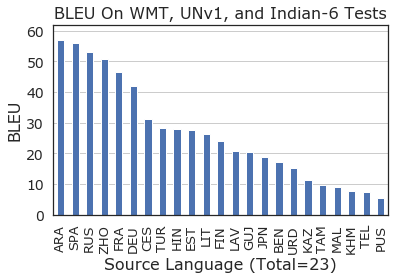

In [34]:
tab_rest= tab[(tab['Test Name'] != 'neulab_tedtalksv1') & (tab['Test Name'] != 'OPUS100v1') ].sort_values(by='BLEU', ascending=False).drop_duplicates(['Language'], keep='first')
viz_args = dict(xlabel=f'Source Language (Total={len(tab_rest)})', ylabel='BLEU', figsize=(6, 3.5), legend=False, title=f'BLEU On WMT, UNv1, and Indian-6 Tests')
ax = tab_rest[['Language', 'BLEU']].plot.bar(x='Language', y='BLEU', **viz_args)
ax.grid(axis='y')
plt.ylim(0, 62)
plt.yticks(fontsize=14)
plt.xticks(fontsize=13)
plt.xlabel(viz_args['xlabel'], fontsize=16)
plt.ylabel(viz_args['ylabel'], fontsize=16)
plt.title(viz_args['title'], fontsize=16)
plt.savefig('charts/BLEU-wmt-etc.pdf', bbox_inches='tight')

In [35]:
tab_rest

,Test,BLEU,MacroF1,ChrF,Test Name,Language
178,UNv1_test-ara_eng,57.1,51.5,0.77,UNv1,ARA
180,UNv1_test-spa_eng,56.0,53.4,0.77,UNv1,SPA
179,UNv1_test-rus_eng,53.2,50.4,0.75,UNv1,RUS
181,UNv1_test-zho_eng,50.9,48.7,0.74,UNv1,ZHO
177,UNv1_test-fra_eng,46.4,47.1,0.70,UNv1,FRA
69,newstest2018_deen-deu_eng,42.0,47.6,0.65,newstest2018_deen,DEU
82,newstest2019_encs-ces_eng,31.1,40.0,0.58,newstest2019_encs,CES
84,newstest2018_tren-tur_eng,28.3,37.9,0.56,newstest2018_tren,TUR
19,IITBv1_5_test-hin_eng,27.8,34.2,0.57,IITBv1_5,HIN
65,newstest2018_eten-est_eng,27.7,34.6,0.55,newstest2018_eten,EST


In [13]:
help(ax.grid)

Help on method grid in module matplotlib.axes._base:

grid(b=None, which='major', axis='both', **kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    Configure the grid lines.
    
    Parameters
    ----------
    b : bool or None, optional
        Whether to show the grid lines. If any *kwargs* are supplied,
        it is assumed you want the grid on and *b* will be set to True.
    
        If *b* is *None* and there are no *kwargs*, this toggles the
        visibility of the lines.
    
    which : {'major', 'minor', 'both'}, optional
        The grid lines to apply the changes on.
    
    axis : {'both', 'x', 'y'}, optional
        The axis to apply the changes on.
    
    **kwargs : `.Line2D` properties
        Define the line properties of the grid, e.g.::
    
            grid(color='r', linestyle='-', linewidth=2)
    
        Valid *kwargs* are
    
      agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n,